# Pacotes

In [1]:
# Bibliotecas padrão e manipulação de dados
import os
import pickle
import re
import warnings
from datetime import datetime, date
import numpy as np
import pandas as pd
from pytz import timezone
from unidecode import unidecode

# Configurações e filtros
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

plt.style.use('ggplot')

# Machine Learning - Modelos e Pré-processamento
import shap
import sklearn
import xgboost as xgb
import lightgbm as lgb
import ppscore as pps
from catboost import Pool
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold, StratifiedKFold, GridSearchCV
)
from sklearn.metrics import (
    accuracy_score, average_precision_score, classification_report, confusion_matrix, f1_score,
    log_loss, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import (
    VarianceThreshold, RFE, SelectFromModel, SequentialFeatureSelector, mutual_info_classif, mutual_info_regression
)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import permutation_importance
from sklearn.neighbors import KDTree
from sklearn.tree import DecisionTreeClassifier
from boruta import BorutaPy

# Balanceamento de classes
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import make_pipeline

# Estatística e testes de hipótese
from scipy.stats import (
    chi2_contingency, kruskal, ks_2samp, fisher_exact, mannwhitneyu, power_divergence
)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelos avançados e otimização
from hyperopt import fmin, tpe, Trials, hp, STATUS_OK
from hyperopt.pyll import scope
from skopt import forest_minimize

# Avaliação de modelos e explanação
from shap import Explainer

# Salvamento e carregamento de modelos com MLflow
#import mlflow
#from mlflow.models import infer_signature
#import mlflow.lightgbm

import catboost as ctb

# Impressão de versões das bibliotecas utilizadas
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print(f"LightGBM version: {lgb.__version__}")
print(f"CatBoost version: {ctb.__version__}")
print(f"SHAP version: {shap.__version__}")
print(f"PPScore version: {pps.__version__}")
print(f"missingno version: {msno.__version__}")
#print(f"MLflow version: {mlflow.__version__}")

Pandas version: 2.1.4
NumPy version: 1.26.2
Scikit-learn version: 1.4.2
XGBoost version: 2.0.2
LightGBM version: 4.4.0
CatBoost version: 1.2.2
SHAP version: 0.44.0
PPScore version: 0.0.2
missingno version: 0.5.2


In [2]:
# 1. Manipulação de dados
import pandas as pd
import numpy as np

# 2. Pré-processamento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# 3. Balanceamento de classes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 4. Visualização
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# 5. Modelos de Machine Learning
import xgboost as xgb
from xgboost import XGBClassifier

# 6. Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
)
from sklearn.metrics import precision_recall_curve

# 7. Otimização de hiperparâmetros
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from hyperopt.pyll.base import scope

# 8. Salvamento e carregamento de modelos
import pickle

# Dicionário com as bibliotecas e suas versões
libraries = {
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "scikit-learn": "sklearn" in globals() and sklearn.__version__,
    "imblearn": SMOTE.__module__.split('.')[0] + " (" + SMOTE.__module__.split('.')[1] + ")",
    "matplotlib": plt.matplotlib.__version__,
    "xgboost": xgb.__version__,
    "hyperopt": fmin.__module__.split('.')[0],
    "pickle": "Built-in library (Python Standard Library)"
}

# Exibindo as versões das bibliotecas
for lib, version in libraries.items():
    print(f"{lib}: {version}")


pandas: 2.1.4
numpy: 1.26.2
scikit-learn: 1.4.2
imblearn: imblearn (over_sampling)
matplotlib: 3.8.2
xgboost: 2.0.2
hyperopt: hyperopt
pickle: Built-in library (Python Standard Library)


# Datasets

In [3]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [4]:
dfh1 = pd.read_csv("hipertuning_results1.csv")
dfh2 = pd.read_csv("hipertuning_results2.csv")
dfh3 = pd.read_csv("hipertuning_results3.csv")
dfh4 = pd.read_csv("hipertuning_results4.csv")
dfh5 = pd.read_csv("hipertuning_results5.csv")
dfh6 = pd.read_csv("hipertuning_results6.csv")
dfh7 = pd.read_csv("hipertuning_results7.csv")
dfh8 = pd.read_csv("hipertuning_results8.csv")
dfh9 = pd.read_csv("hipertuning_results9.csv")
dfh10 = pd.read_csv("hipertuning_results10.csv")
dfh11 = pd.read_csv("hipertuning_results11.csv")
dfh12 = pd.read_csv("hipertuning_results12.csv")

dfh1['hiper_seed'] = 40
dfh2['hiper_seed'] = 42
dfh3['hiper_seed'] = 33
dfh4['hiper_seed'] = 50
dfh5['hiper_seed'] = 73
dfh6['hiper_seed'] = 99
dfh7['hiper_seed'] = 47
dfh8['hiper_seed'] = 157
dfh9['hiper_seed'] = 171
dfh10['hiper_seed'] = 1546
dfh11['hiper_seed'] = 4795112
dfh12['hiper_seed'] = 951753

In [5]:
# Lista com todos os DataFrames
dfs = [dfh1, dfh2, dfh3, dfh4, dfh5, dfh6, dfh7, dfh8,dfh9,dfh10,dfh11,dfh12]

# Concatenando os DataFrames
df_total = pd.concat(dfs, ignore_index=True)


In [6]:
df_total

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,sampling_method,tree_method,device,enable_categorical,scale_pos_weight,eval_metric,objective,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,validate_parameters,max_bin,updater,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,hiper_seed
0,0.667581,3,0.286699,0.294582,0.276844,0.677335,0.683252,0.670238,0.667581,0.668621,0.666558,0.160937,0.160952,0.160907,7,9.203534,83.904506,4.420496,13,0.520985,0.916074,0.829092,640,0.018108,9.771637,0.818802,gradient_based,gpu_hist,cuda,True,4.861563,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,10,14,168,True,88,grow_gpu_hist,0.296840,0.293777,0.291560,0.295084,0.295652,0.684589,0.681207,0.682258,0.681482,0.686723,0.666301,0.666695,0.666128,0.666866,0.666799,0.160735,0.160950,0.160950,0.160950,0.160950,40
1,0.571843,10,0.319385,0.329592,0.291755,0.701510,0.709028,0.682026,0.571843,0.583119,0.562138,0.160537,0.160952,0.159458,8,10.377446,1.649072,6.622069,15,0.713269,0.999366,0.673522,150,0.040472,7.641378,0.986673,gradient_based,gpu_hist,cuda,True,3.613753,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,4,11,248,True,240,grow_gpu_hist,0.331123,0.336533,0.325966,0.327082,0.327256,0.709812,0.713440,0.707201,0.705865,0.708823,0.560819,0.561833,0.562112,0.563624,0.562304,0.159716,0.158979,0.159763,0.159438,0.159393,40
2,0.670102,280,0.352666,0.362810,0.250483,0.724070,0.729964,0.656959,0.670102,0.751083,0.662542,0.412857,0.773437,0.396877,10,9.797238,90.063334,1.063482,9,0.496344,0.750233,0.764802,280,0.199510,9.603143,0.596508,gradient_based,gpu_hist,cuda,True,6.387602,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,19,24,40,True,96,grow_gpu_hist,0.364461,0.373988,0.358553,0.360470,0.356578,0.729760,0.736014,0.726762,0.727626,0.729658,0.661640,0.660975,0.663271,0.662715,0.664417,0.394206,0.397637,0.397738,0.398219,0.397021,40
3,0.681831,240,0.326382,0.346538,0.255265,0.708297,0.720765,0.658785,0.681831,0.748331,0.663032,0.462084,0.839048,0.403643,6,10.712183,83.684309,5.100654,3,0.681900,0.872335,0.987845,240,0.030757,3.010520,0.816312,gradient_based,gpu_hist,cuda,True,6.125705,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,27,29,184,True,216,grow_gpu_hist,0.348989,0.354634,0.344480,0.344912,0.339677,0.721375,0.725198,0.718557,0.718325,0.720370,0.661645,0.662397,0.662859,0.663032,0.665230,0.403490,0.403628,0.403180,0.404345,0.403572,40
4,0.572314,5,0.279808,0.290239,0.261286,0.673925,0.682629,0.657936,0.572314,0.579603,0.565856,0.160894,0.160952,0.160703,23,7.883552,52.819884,9.590326,3,0.869201,0.706881,0.894597,500,0.075096,9.866598,0.908823,gradient_based,gpu_hist,cuda,True,3.574475,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,17,34,56,True,152,grow_gpu_hist,0.293292,0.291298,0.290291,0.288361,0.287952,0.682454,0.684634,0.682942,0.680186,0.682929,0.565456,0.566370,0.566096,0.565073,0.566288,0.160556,0.160379,0.160938,0.160658,0.160983,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.529932,1,0.260962,0.260962,0.260962,0.662073,0.662073,0.662073,0.529932,0.529932,0.529932,0.160952,0.160952,0.160952,28,15.837170,77.885061,6.314910,3,0.528023,0.492018,0.650304,1260,0.365891,5.563465,0.665550,gradient_based,gpu_hist,cuda,True,3.008462,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,31,39,148,True,268,grow_gpu_hist,0.257775,0.264480,0.2

In [7]:
def heatmap_correlacao_spearman(df: pd.DataFrame, annot: bool = True, figsize: tuple = (30, 30)):
    """
    Calcula a matriz de correlação de Spearman entre as variáveis numéricas de um DataFrame e
    gera um heatmap para visualização.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém os dados.
    annot : bool, opcional
        Se True, exibe os valores das correlações no heatmap. O padrão é True.
    figsize : tuple, opcional
        Tamanho da figura do heatmap. O padrão é (10, 8).

    Retorna:
    --------
    None
        Exibe o heatmap da correlação de Spearman.
    """
    
    # Selecionar apenas colunas numéricas
    df_numerico = df.select_dtypes(include=['float64', 'int64'])
    
    if df_numerico.empty:
        raise ValueError("Não há colunas numéricas no DataFrame para calcular a correlação.")
    
    # Calcular a matriz de correlação de Spearman
    matriz_correlacao = df_numerico.corr(method='spearman')
    
    # Gerar o heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(matriz_correlacao, annot=annot, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Heatmap de Correlação de Spearman')
    plt.show()

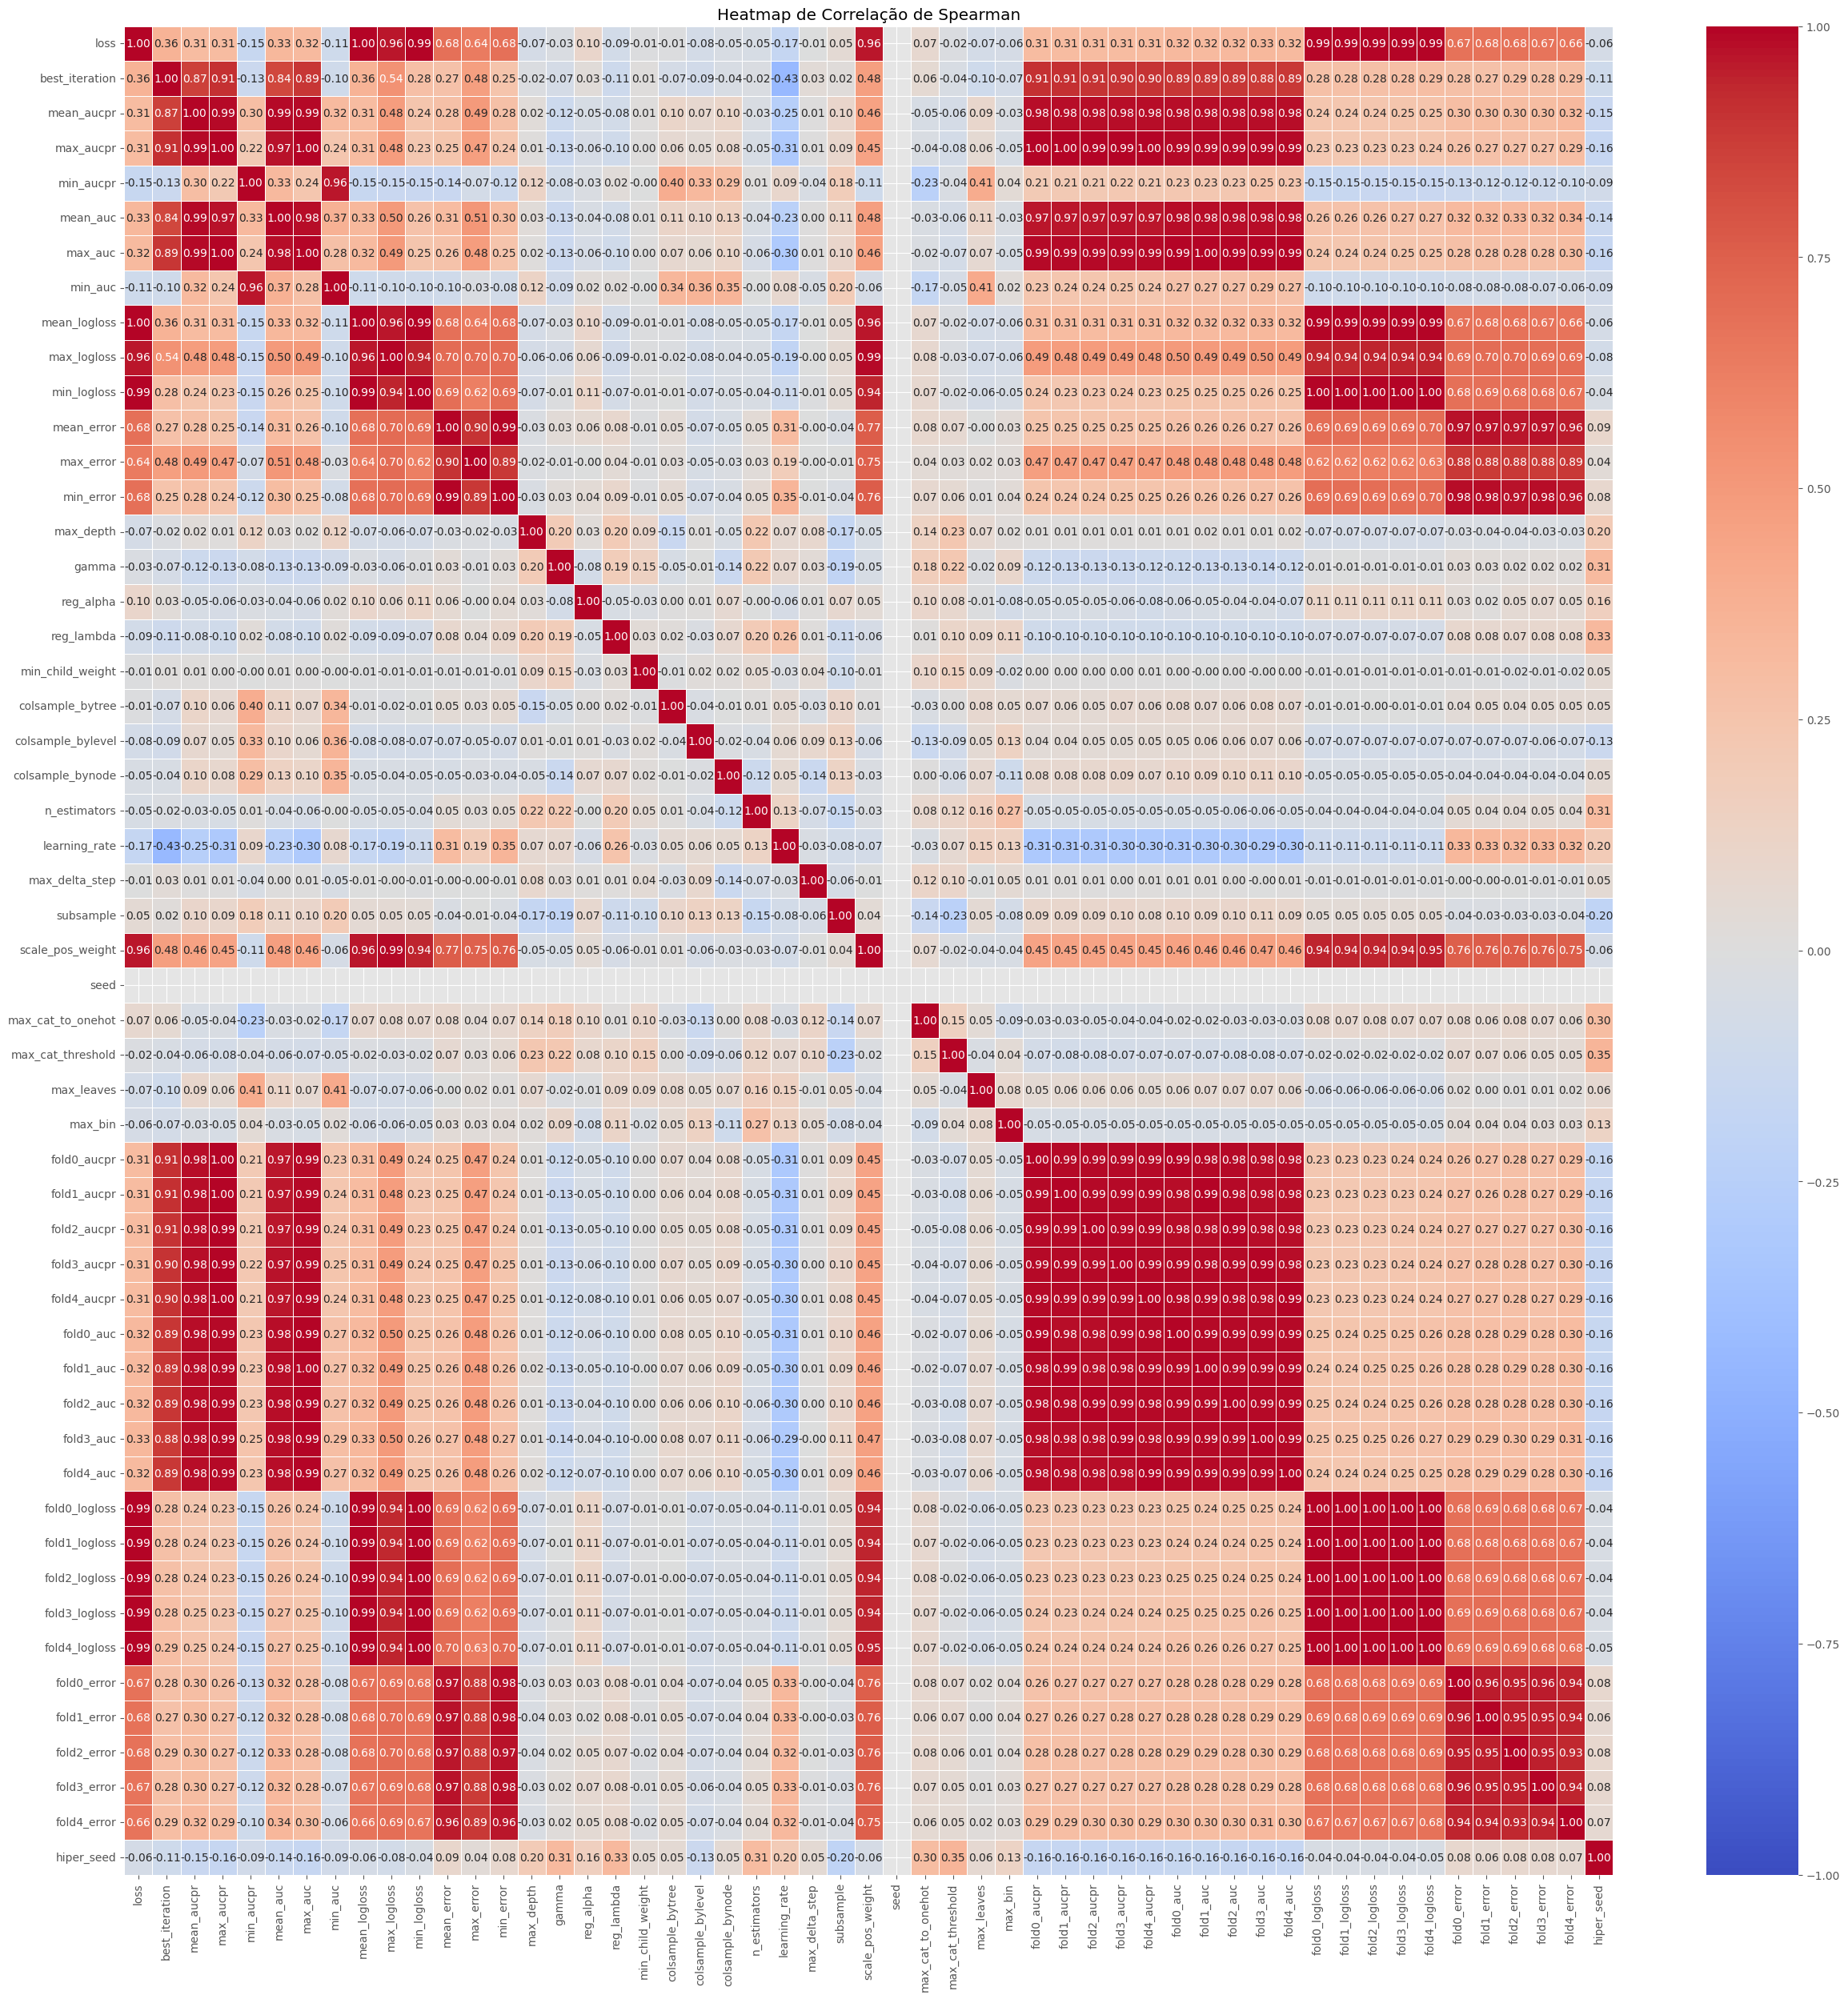

In [8]:
heatmap_correlacao_spearman(df_total)

In [9]:
df_total.describe()

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,scale_pos_weight,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,max_bin,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,hiper_seed
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.0,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3.400000e+03
mean,0.607643,130.896471,0.301319,0.308617,0.265615,0.688559,0.693461,0.663570,0.607643,0.636405,0.601073,0.239421,0.325510,0.231613,21.693824,10.975413,58.480990,6.918023,14.957941,0.611961,0.725640,0.703097,726.317647,0.150789,5.653133,0.697495,4.549042,33.0,28.264706,32.269412,166.185882,190.464706,0.310342,0.313597,0.307470,0.306512,0.305068,0.693538,0.697280,0.691848,0.691341,0.693190,0.600701,0.600633,0.600829,0.601252,0.601964,0.231365,0.231290,0.231363,0.231869,0.232214,5.632555e+05
std,0.064525,260.810537,0.040330,0.043935,0.019320,0.029207,0.031004,0.019154,0.064525,0.096817,0.062300,0.125452,0.268737,0.112053,10.338352,6.376807,38.922016,4.285857,7.783421,0.144933,0.182290,0.186349,413.212323,0.137767,3.068652,0.172755,1.558739,0.0,17.740055,17.999078,68.101914,88.758827,0.044368,0.046236,0.043728,0.043062,0.042759,0.031107,0.031800,0.030864,0.030583,0.031067,0.062012,0.062152,0.062089,0.062377,0.062919,0.111836,0.112168,0.111736,0.112137,0.112842,1.358418e+06
min,0.517431,1.000000,0.175664,0.175664,0.175664,0.528883,0.528883,0.528883,0.517431,0.517431,0.513700,0.160404,0.160571,0.158629,3.000000,0.000704,0.000713,0.000360,1.000000,0.300075,0.300074,0.300495,80.000000,0.010001,0.000499,0.300361,3.000127,33.0,3.000000,3.000000,12.000000,32.000000,0.183934,0.170116,0.172996,0.174820,0.176452,0.553258,0.519502,0.523293,0.523383,0.524977,0.513675,0.512784,0.512854,0.513827,0.514986,0.158092,0.158228,0.158419,0.158329,0.159068,3.300000e+01
25%,0.555983,1.000000,0.274837,0.277471,0.255776,0.671287,0.674147,0.656044,0.555983,0.561862,0.550934,0.160885,0.160952,0.160656,14.000000,6.040332,26.392324,3.387134,9.000000,0.506619,0.589090,0.551778,380.000000,0.039121,3.196687,0.569227,3.376626,33.0,14.000000,18.000000,120.000000,120.000000,0.278513,0.280082,0.276621,0.276609,0.274970,0.673717,0.676797,0.672756,0.672496,0.673892,0.550812,0.550690,0.550842,0.550852,0.551043,0.160657,0.160547,0.160737,0.160644,0.160779,4.700000e+01
50%,0.594917,6.000000,0.292468,0.301103,0.269395,0.684255,0.690030,0.668440,0.594917,0.602221,0.590033,0.160952,0.160954,0.160952,21.000000,10.515693,53.788245,6.506588,15.000000,0.599354,0.748851,0.716221,690.000000,0.095618,5.671487,0.699020,3.977691,33.0,25.000000,31.000000,168.000000,192.000000,0.303896,0.306578,0.300371,0.298799,0.297817,0.690699,0.694034,0.689131,0.687553,0.689849,0.589799,0.589654,0.589838,0.590272,0.590513,0.160959,0.160950,0.160950,0.160950,0.161006,1.280000e+02
75%,0.645024,110.000000,0.326474,0.339374,0.279249,0.708596,0.717345,0.676575,0.645024,0.685881,0.638494,0.320335,0.431928,0.308719,29.000000,15.259945,85.788265,9.931557,20.000000,0.719934,0.880378,0.863301,1020.000000,0.236565,8.061810,0.837780,5.247515,33.0,39.000000,45.000

In [10]:
# Salva o DataFrame em um arquivo CSV
df_total.to_csv('hipertuning_join_final.csv', index=False)

In [11]:
df = df_total

In [40]:
# Definir o limite de oscilação aceitável (10%)
oscillation_threshold = 0.05

# Lista de métricas usadas nos folds
metrics = ["aucpr", "auc", "logloss", "error"]

# Identificar as colunas dos folds para cada métrica
fold_columns = {metric: [f"fold{i}_{metric}" for i in range(5)] for metric in metrics}

# Criar um dataframe filtrado que respeita o critério de oscilação máxima de 10% entre os folds
valid_rows = []

for index, row in df.iterrows():
    valid = True
    for metric, cols in fold_columns.items():
        fold_values = row[cols].values
        max_value = fold_values.max()
        min_value = fold_values.min()
        
        # Calcular a oscilação percentual
        if (max_value - min_value) / max_value > oscillation_threshold:
            valid = False
            break
    
    if valid:
        valid_rows.append(row)

# Criar novo DataFrame com apenas os registros que atendem ao critério de oscilação
filtered_df = pd.DataFrame(valid_rows)

# Exibir os melhores parâmetros ordenando pelo mean_aucpr e mean_auc de forma decrescente
best_parameters_df = filtered_df.sort_values(by=["mean_aucpr", "mean_auc"], ascending=[False, False])

# Exibir os melhores resultados
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Melhores Parâmetros", dataframe=best_parameters_df)


In [41]:
best_parameters_df.shape

(2585, 61)

In [42]:
best_parameters_df

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,sampling_method,tree_method,device,enable_categorical,scale_pos_weight,eval_metric,objective,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,validate_parameters,max_bin,updater,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,hiper_seed
989,0.693901,790,0.395385,0.400995,0.295594,0.748500,0.751409,0.684829,0.693901,0.852360,0.682817,0.424544,0.839048,0.406904,30,7.753601,38.675785,8.045556,9,0.678465,0.673553,0.697562,790,0.101643,7.077371,0.598904,gradient_based,gpu_hist,cuda,True,8.152096,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,4,36,244,True,128,grow_gpu_hist,0.403738,0.406049,0.399813,0.397575,0.397680,0.752045,0.755165,0.750056,0.748147,0.751606,0.681826,0.682358,0.681315,0.683144,0.685769,0.407566,0.405667,0.404715,0.407380,0.409463,73
1641,0.610140,862,0.394716,0.401058,0.280054,0.747081,0.750112,0.677584,0.610140,0.753526,0.592520,0.338517,0.778490,0.318093,10,2.203384,33.097571,6.402130,29,0.479631,0.654632,0.860458,1150,0.163843,3.554949,0.700391,gradient_based,gpu_hist,cuda,True,6.451227,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,7,40,216,True,248,grow_gpu_hist,0.401976,0.408967,0.399067,0.396090,0.399192,0.749930,0.754848,0.747968,0.748204,0.749588,0.588602,0.590650,0.596158,0.593743,0.593448,0.314908,0.315337,0.321955,0.320858,0.317409,47
3268,0.564210,513,0.392700,0.398154,0.281415,0.746567,0.749314,0.677940,0.564210,0.678959,0.555233,0.290671,0.393311,0.282931,37,3.181981,19.072348,11.246243,28,0.834933,0.504141,0.907831,970,0.183543,5.408834,0.761743,gradient_based,gpu_hist,cuda,True,5.265871,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,29,55,204,True,192,grow_gpu_hist,0.397434,0.405652,0.395733,0.396013,0.395561,0.748780,0.754100,0.745856,0.748171,0.749431,0.555406,0.554243,0.554566,0.555430,0.556519,0.283137,0.281819,0.282860,0.282983,0.283857,951753
104,0.696275,360,0.392566,0.403291,0.284459,0.746459,0.751515,0.674165,0.696275,0.875084,0.660763,0.429346,0.839048,0.381752,25,1.596611,22.606322,9.966421,9,0.808911,0.816277,0.818376,360,0.144208,3.781878,0.893388,gradient_based,gpu_hist,cuda,True,8.725146,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,21,35,240,True,128,grow_gpu_hist,0.404109,0.412789,0.398764,0.400152,0.400478,0.750893,0.757741,0.747867,0.749526,0.751366,0.658941,0.655901,0.662838,0.663988,0.662148,0.380219,0.376516,0.383493,0.385318,0.383213,40
2733,0.722010,1140,0.392365,0.403847,0.291552,0.746504,0.751880,0.687182,0.722010,0.889056,0.683775,0.454525,0.839048,0.400790,29,0.886754,98.726108,1.497871,11,0.636526,0.897475,0.752114,1140,0.057075,6.996108,0.730942,gradient_based,gpu_hist,cuda,True,8.757635,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,11,48,164,True,272,grow_gpu_hist,0.405264,0.413066,0.403048,0.399593,0.398236,0.751650,0.756716,0.750886,0.749224,0.750739,0.683707,0.680953,0.686423,0.683088,0.684705,0.401115,0.399104,0.403236,0.400381,0.400112,4795112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,0.583218,1,0.201307,0.201307,0.201307,0.584292,0.584292,0.584292,0.583218,0.583218,0.583218,0.160952,0.160952,0.160952,3,11.693771,81.473277,11.187002,17,0.631916,0.519572,0.357543,550,0.233024,10.188449,0.520907,gradient_based,gpu_hist,cuda,True,3.620730,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,19,75,148,True,1

In [43]:
best_parameters_df.describe()

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,scale_pos_weight,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,max_bin,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,hiper_seed
count,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.0,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2.585000e+03
mean,0.610804,166.798839,0.308797,0.316855,0.265900,0.693882,0.699203,0.663949,0.610804,0.646633,0.603040,0.252222,0.361406,0.242219,21.381044,10.806198,57.223465,6.795564,15.031721,0.617376,0.726767,0.705172,717.381044,0.131956,5.663871,0.701287,4.701861,33.0,28.299033,31.935783,163.360155,189.176015,0.318591,0.321868,0.315670,0.314696,0.313326,0.699257,0.702937,0.697550,0.697001,0.699125,0.602607,0.602580,0.602746,0.603245,0.604038,0.241978,0.242042,0.241949,0.242265,0.242905,5.353285e+05
std,0.067988,286.675985,0.041129,0.044632,0.019304,0.029178,0.030887,0.018880,0.067988,0.104259,0.065119,0.135319,0.291288,0.120190,10.317252,6.286972,38.335726,4.249396,7.795107,0.141841,0.181296,0.184544,410.966433,0.127381,3.081700,0.172729,1.686609,0.0,17.762754,17.948793,68.153492,88.325620,0.044897,0.047029,0.044366,0.043703,0.043398,0.030887,0.031717,0.030725,0.030446,0.030824,0.064765,0.064911,0.064882,0.065216,0.065865,0.119794,0.120279,0.119737,0.120220,0.120955,1.343935e+06
min,0.517431,1.000000,0.189875,0.189875,0.188995,0.577828,0.577828,0.549810,0.517431,0.517431,0.513700,0.160404,0.160571,0.158629,3.000000,0.000704,0.000713,0.000360,1.000000,0.300685,0.300074,0.300495,80.000000,0.010001,0.000639,0.300361,3.000127,33.0,3.000000,3.000000,12.000000,32.000000,0.188077,0.189191,0.190683,0.190048,0.191376,0.577226,0.579979,0.576193,0.574752,0.579539,0.513675,0.512784,0.512854,0.513827,0.514986,0.158092,0.158228,0.158419,0.158329,0.159068,3.300000e+01
25%,0.555367,1.000000,0.280065,0.284086,0.256067,0.675383,0.679015,0.656400,0.555367,0.561988,0.549478,0.160881,0.160952,0.160613,13.000000,5.962012,25.953748,3.326553,9.000000,0.513771,0.590609,0.558870,370.000000,0.033275,3.195560,0.572188,3.353613,33.0,14.000000,18.000000,116.000000,112.000000,0.285243,0.287120,0.283560,0.282965,0.281670,0.679026,0.682163,0.677311,0.677458,0.678910,0.549136,0.548957,0.549197,0.549226,0.549614,0.160612,0.160535,0.160681,0.160569,0.160737,4.700000e+01
50%,0.596111,11.000000,0.299219,0.309027,0.269853,0.688876,0.695774,0.668883,0.596111,0.606264,0.590248,0.160952,0.160952,0.160952,21.000000,10.364594,52.418241,6.372892,15.000000,0.605528,0.749644,0.721842,680.000000,0.078469,5.644430,0.704893,3.999976,33.0,25.000000,30.000000,168.000000,192.000000,0.311979,0.314015,0.307447,0.306591,0.305238,0.696402,0.699849,0.694451,0.693435,0.695616,0.589844,0.589967,0.589981,0.590547,0.590930,0.160959,0.160950,0.160950,0.160950,0.160950,9.900000e+01
75%,0.652081,243.000000,0.348405,0.361210,0.279372,0.722448,0.729927,0.676888,0.652081,0.720079,0.643528,0.365521,0.728286,0.344357,28.000000,14.861038,84.424329,9.718732,20.000000,0.723971,0.881883,0.860460,1000.000000,0.200727,8.117192,0.841313,5.785209,33.0,39.000000,44.00

In [ ]:
"mean_aucpr", "mean_auc", "mean_logloss", "mean_error"

In [ ]:
(mean_aucpr+mean_auc)-(mean_logloss+mean_error) quanto maior melhor

In [44]:
# Selecionar o melhor conjunto de parâmetros com base nas métricas
# Critério: Melhor média de AUCPR e AUC, minimizando LogLoss e Error

best_model = best_parameters_df.sort_values(
    by=["mean_aucpr", "mean_auc", "mean_logloss", "mean_error"], 
    ascending=[False, False, True, True]
).iloc[0]  # Pega a melhor linha

# Exibir os melhores parâmetros selecionados
best_model_df = best_model.to_frame().T  # Transformar em DataFrame para melhor visualização

In [45]:
best_model_df

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,sampling_method,tree_method,device,enable_categorical,scale_pos_weight,eval_metric,objective,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,validate_parameters,max_bin,updater,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,hiper_seed
989,0.693901,790,0.395385,0.400995,0.295594,0.7485,0.751409,0.684829,0.693901,0.85236,0.682817,0.424544,0.839048,0.406904,30,7.753601,38.675785,8.045556,9,0.678465,0.673553,0.697562,790,0.101643,7.077371,0.598904,gradient_based,gpu_hist,cuda,True,8.152096,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,4,36,244,True,128,grow_gpu_hist,0.403738,0.406049,0.399813,0.397575,0.39768,0.752045,0.755165,0.750056,0.748147,0.751606,0.681826,0.682358,0.681315,0.683144,0.685769,0.407566,0.405667,0.404715,0.40738,0.409463,73


In [17]:
list(best_parameters_df)

['loss',
 'best_iteration',
 'mean_aucpr',
 'max_aucpr',
 'min_aucpr',
 'mean_auc',
 'max_auc',
 'min_auc',
 'mean_logloss',
 'max_logloss',
 'min_logloss',
 'mean_error',
 'max_error',
 'min_error',
 'max_depth',
 'gamma',
 'reg_alpha',
 'reg_lambda',
 'min_child_weight',
 'colsample_bytree',
 'colsample_bylevel',
 'colsample_bynode',
 'n_estimators',
 'learning_rate',
 'max_delta_step',
 'subsample',
 'sampling_method',
 'tree_method',
 'device',
 'enable_categorical',
 'scale_pos_weight',
 'eval_metric',
 'objective',
 'seed',
 'max_cat_to_onehot',
 'max_cat_threshold',
 'max_leaves',
 'validate_parameters',
 'max_bin',
 'updater',
 'fold0_aucpr',
 'fold1_aucpr',
 'fold2_aucpr',
 'fold3_aucpr',
 'fold4_aucpr',
 'fold0_auc',
 'fold1_auc',
 'fold2_auc',
 'fold3_auc',
 'fold4_auc',
 'fold0_logloss',
 'fold1_logloss',
 'fold2_logloss',
 'fold3_logloss',
 'fold4_logloss',
 'fold0_error',
 'fold1_error',
 'fold2_error',
 'fold3_error',
 'fold4_error',
 'hiper_seed']

In [46]:
# Converter o melhor resultado em um dicionário de hiperparâmetros para o modelo

# Remover colunas que não fazem parte dos hiperparâmetros do modelo
columns_to_exclude = ["loss", "best_iteration", "mean_aucpr", "max_aucpr", "min_aucpr", 
                      "mean_auc", "max_auc", "min_auc", "mean_logloss", "max_logloss", 
                      "min_logloss", "mean_error", "max_error", "min_error", "hiper_seed", 
                      "loss", "hiper_seed","best_iteration"]

best_model_df.iloc[0].drop(columns=columns_to_exclude).to_dict()

{'loss': 0.6939008588095683,
 'best_iteration': 790,
 'mean_aucpr': 0.395385023337667,
 'max_aucpr': 0.4009948410873152,
 'min_aucpr': 0.2955937378778636,
 'mean_auc': 0.7484999557385168,
 'max_auc': 0.7514087846296374,
 'min_auc': 0.6848292325705914,
 'mean_logloss': 0.6939008588095683,
 'max_logloss': 0.8523603185230503,
 'min_logloss': 0.682816596773061,
 'mean_error': 0.4245437014338261,
 'max_error': 0.8390484595084999,
 'min_error': 0.4069042889813604,
 'max_depth': 30,
 'gamma': 7.753601066522844,
 'reg_alpha': 38.67578458158398,
 'reg_lambda': 8.045555796655368,
 'min_child_weight': 9,
 'colsample_bytree': 0.6784650993771828,
 'colsample_bylevel': 0.6735531920720436,
 'colsample_bynode': 0.6975621457278535,
 'n_estimators': 790,
 'learning_rate': 0.1016429027225897,
 'max_delta_step': 7.077370952120399,
 'subsample': 0.5989043212563664,
 'sampling_method': 'gradient_based',
 'tree_method': 'gpu_hist',
 'device': 'cuda',
 'enable_categorical': True,
 'scale_pos_weight': 8.152095

In [94]:
best_model_df

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,sampling_method,tree_method,device,enable_categorical,scale_pos_weight,eval_metric,objective,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,validate_parameters,max_bin,updater,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,hiper_seed
989,0.693901,790,0.395385,0.400995,0.295594,0.7485,0.751409,0.684829,0.693901,0.85236,0.682817,0.424544,0.839048,0.406904,30,7.753601,38.675785,8.045556,9,0.678465,0.673553,0.697562,790,0.101643,7.077371,0.598904,gradient_based,gpu_hist,cuda,True,8.152096,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,4,36,244,True,128,grow_gpu_hist,0.403738,0.406049,0.399813,0.397575,0.39768,0.752045,0.755165,0.750056,0.748147,0.751606,0.681826,0.682358,0.681315,0.683144,0.685769,0.407566,0.405667,0.404715,0.40738,0.409463,73


In [19]:
def compute_custom_score(df):
    """
    Calcula o score customizado proposto: 
    (mean_aucpr + mean_auc) - (mean_logloss + mean_error)
    
    Quanto maior o resultado, melhor.
    
    Args:
        df (pd.DataFrame): DataFrame contendo as colunas necessárias
    
    Returns:
        pd.DataFrame: DataFrame com uma nova coluna 'custom_score'
    """
    df = df.copy()
    df['custom_score'] = (df['mean_aucpr'] + df['mean_auc']) - (df['mean_logloss'] + df['mean_error'])
    return df

# Carregar seus resultados
df_results = pd.read_csv('hipertuning_results1.csv')

# Calcular o custom_score
df_results = compute_custom_score(df_results)

# Ordenar pelo score customizado (quanto maior melhor)
df_sorted = df_results.sort_values(by='custom_score', ascending=False)

# Visualizar os melhores resultados
print(df_sorted[['mean_aucpr', 'mean_auc', 'mean_logloss', 'mean_error', 'custom_score']].head())

# Salvar os resultados ordenados, se desejar
df_sorted.to_csv('hipertuning_results_with_score.csv', index=False)

     mean_aucpr  mean_auc  mean_logloss  mean_error  custom_score
196    0.311374  0.696034      0.528730    0.160576      0.318102
68     0.305259  0.694967      0.529992    0.160742      0.309491
197    0.307704  0.693652      0.535778    0.160768      0.304809
178    0.303234  0.689719      0.528622    0.160682      0.303649
72     0.303731  0.690681      0.531009    0.160772      0.302631


In [21]:
def compute_fold_score(df):
    aucpr_cols = [f'fold{i}_aucpr' for i in range(5)]
    auc_cols = [f'fold{i}_auc' for i in range(5)]
    logloss_cols = [f'fold{i}_logloss' for i in range(5)]
    error_cols = [f'fold{i}_error' for i in range(5)]

    df = df.copy()

    df['custom_fold_score'] = (
        df[auc_cols].mean(axis=1) +
        df[aucpr_cols].mean(axis=1)
        -
        (df[logloss_cols].mean(axis=1) +
         df[error_cols].mean(axis=1))
    )

    return df.sort_values(by='custom_fold_score', ascending=False)

In [23]:
compute_fold_score(df_total)

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,sampling_method,tree_method,device,enable_categorical,scale_pos_weight,eval_metric,objective,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,validate_parameters,max_bin,updater,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,hiper_seed,custom_fold_score
2920,0.536687,46,0.333562,0.341423,0.282159,0.713437,0.718679,0.675477,0.536687,0.554045,0.522895,0.160515,0.160952,0.158916,47,6.892048,9.644967,14.566520,4,0.865838,0.403320,0.966176,1990,0.012211,3.610268,0.925342,gradient_based,gpu_hist,cuda,True,3.134588,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,7,20,220,True,152,grow_gpu_hist,0.344569,0.347371,0.338964,0.338739,0.337475,0.718634,0.721609,0.717132,0.716520,0.719499,0.522670,0.522676,0.522914,0.522749,0.523467,0.158518,0.158878,0.159527,0.158587,0.159068,951753,0.378292
2921,0.555990,44,0.338930,0.346627,0.287864,0.717930,0.723074,0.678857,0.555990,0.573189,0.541606,0.160423,0.160954,0.158629,47,6.819792,1.408130,14.809330,4,0.882646,0.409001,0.998971,1930,0.010452,4.485783,0.994289,gradient_based,gpu_hist,cuda,True,3.426544,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,4,24,376,True,168,grow_gpu_hist,0.349726,0.351010,0.344230,0.344805,0.343362,0.722862,0.726469,0.721619,0.720466,0.723956,0.541053,0.541530,0.541716,0.541954,0.541775,0.158092,0.158654,0.158867,0.158329,0.159203,951753,0.369466
1567,0.526675,19,0.320070,0.331791,0.283904,0.702431,0.710617,0.679317,0.526675,0.543369,0.513700,0.160502,0.160952,0.159543,27,9.923210,46.840363,10.203949,21,0.552758,0.848963,0.675312,900,0.041816,7.351966,0.720247,gradient_based,gpu_hist,cuda,True,3.000513,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,6,23,244,True,352,grow_gpu_hist,0.335239,0.339258,0.331884,0.327306,0.325266,0.710673,0.715681,0.710562,0.706458,0.709711,0.513675,0.512784,0.512854,0.514202,0.514986,0.159436,0.158822,0.159897,0.159247,0.160311,47,0.369165
1526,0.527933,14,0.323303,0.332773,0.288571,0.704197,0.710656,0.681070,0.527933,0.542970,0.516240,0.160571,0.160952,0.159332,39,5.316253,46.378168,11.252534,28,0.513929,0.983768,0.968969,940,0.052046,10.318176,0.683863,gradient_based,gpu_hist,cuda,True,3.005811,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,3,11,200,True,288,grow_gpu_hist,0.329524,0.341614,0.335942,0.329530,0.327256,0.706045,0.717950,0.712072,0.708424,0.708789,0.518023,0.513811,0.515463,0.516645,0.517257,0.159638,0.159348,0.159046,0.159158,0.159471,47,0.367857
2492,0.528636,26,0.321911,0.330696,0.292753,0.705452,0.711659,0.685986,0.528636,0.544361,0.516022,0.160707,0.160956,0.159590,38,16.455249,18.694489,5.696708,25,0.568877,0.853124,0.955331,380,0.024021,11.055187,0.909438,gradient_based,gpu_hist,cuda,True,3.000874,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,40,60,248,True,64,grow_gpu_hist,0.333777,0.336890,0.327626,0.324712,0.330478,0.712148,0.717205,0.709292,0.707311,0.712341,0.515641,0.515221,0.516171,0.516127,0.516947,0.159246,0.159572,0.159751,0.159527,0.159852,1546,0.366744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,0.862035,1,0.241526,0.241526,0.241526,0.645880,0.645880,0.645880,0.862035,0.862035,0.862035,0.839048,0.839048,0.839048,5,8.128798,105.369151,10.285382,7,0.751176,0.509693,0.915369,350,0.013143,7.063756,0.999945,gradient_based,gpu_hist,cuda,True,8.094223,"('aucpr', 

In [20]:
df_sorted

,loss,best_iteration,mean_aucpr,max_aucpr,min_aucpr,mean_auc,max_auc,min_auc,mean_logloss,max_logloss,min_logloss,mean_error,max_error,min_error,max_depth,gamma,reg_alpha,reg_lambda,min_child_weight,colsample_bytree,colsample_bylevel,colsample_bynode,n_estimators,learning_rate,max_delta_step,subsample,sampling_method,tree_method,device,enable_categorical,scale_pos_weight,eval_metric,objective,seed,max_cat_to_onehot,max_cat_threshold,max_leaves,validate_parameters,max_bin,updater,fold0_aucpr,fold1_aucpr,fold2_aucpr,fold3_aucpr,fold4_aucpr,fold0_auc,fold1_auc,fold2_auc,fold3_auc,fold4_auc,fold0_logloss,fold1_logloss,fold2_logloss,fold3_logloss,fold4_logloss,fold0_error,fold1_error,fold2_error,fold3_error,fold4_error,custom_score
196,0.528730,25,0.311374,0.323168,0.272770,0.696034,0.704412,0.672362,0.528730,0.544856,0.516339,0.160576,0.160952,0.159632,13,1.664691,23.721603,5.807962,8,0.588401,0.846556,0.450112,680,0.031864,5.847516,0.902205,gradient_based,gpu_hist,cuda,True,3.010762,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,17,7,208,True,168,grow_gpu_hist,0.324955,0.332539,0.315523,0.321471,0.321353,0.703056,0.710907,0.699387,0.702063,0.706648,0.516718,0.515228,0.516587,0.516438,0.516726,0.159492,0.159203,0.160087,0.159595,0.159785,0.318102
68,0.529992,13,0.305259,0.318096,0.273346,0.694967,0.702395,0.672944,0.529992,0.543759,0.519254,0.160742,0.160952,0.160027,24,8.491710,23.928845,2.086793,18,0.565181,0.643555,0.628640,160,0.051610,5.927743,0.661645,gradient_based,gpu_hist,cuda,True,3.015409,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,27,32,152,True,168,grow_gpu_hist,0.324261,0.322089,0.318370,0.310937,0.314821,0.704631,0.705142,0.704493,0.695986,0.701723,0.518931,0.519226,0.518223,0.519295,0.520595,0.160030,0.159886,0.160121,0.160423,0.159673,0.309491
197,0.535778,22,0.307704,0.317441,0.278583,0.693652,0.700759,0.674026,0.535778,0.549662,0.524470,0.160768,0.160952,0.159930,12,0.473591,34.245239,7.752752,7,0.587704,0.602223,0.454693,670,0.031912,5.774771,0.912459,gradient_based,gpu_hist,cuda,True,3.085688,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,17,8,240,True,168,grow_gpu_hist,0.319671,0.325963,0.318132,0.310676,0.312763,0.700248,0.706839,0.701743,0.696267,0.698695,0.524200,0.523997,0.523206,0.525216,0.525732,0.160074,0.159259,0.160121,0.160233,0.159964,0.304809
178,0.528622,11,0.303234,0.316803,0.268432,0.689719,0.701254,0.657649,0.528622,0.542574,0.517344,0.160682,0.160952,0.160042,16,3.108799,1.834449,2.257660,14,0.625838,0.448061,0.534087,390,0.065311,6.650788,0.816648,gradient_based,gpu_hist,cuda,True,3.005639,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,19,39,216,True,216,grow_gpu_hist,0.325297,0.322753,0.311281,0.308837,0.315848,0.703988,0.704910,0.700918,0.694151,0.702304,0.516326,0.517559,0.516163,0.519054,0.517616,0.159705,0.159606,0.160703,0.160267,0.159931,0.303649
72,0.531009,36,0.303731,0.313590,0.263197,0.690681,0.698126,0.661804,0.531009,0.545603,0.519638,0.160772,0.160954,0.160011,20,11.869028,44.762000,0.838131,18,0.565658,0.566831,0.664891,150,0.021166,9.545955,0.687200,gradient_based,gpu_hist,cuda,True,3.008496,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,30,35,96,True,192,grow_gpu_hist,0.314894,0.321798,0.311700,0.310717,0.308843,0.699042,0.704345,0.695374,0.694385,0.697483,0.519298,0.518044,0.520699,0.519805,0.520343,0.160074,0.159796,0.160155,0.159897,0.160132,0.302631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.750967,390,0.346493,0.358000,0.254520,0.720925,0.728107,0.657149,0.750967,0.847782,0.738898,0.519971,0.839048,0.484696,23,14.632799,71.285648,0.751625,4,0.438797,0.551234,0.596564,390,0.063292,4.620523,0.692161,gradient_based,gpu_hist,cuda,True,7.920576,"('aucpr', 'auc', 'logloss', 'error')",binary:logistic,33,26,28,152

In [34]:
compute_fold_score(df_total).iloc[0]

loss                 0.536687
best_iteration             46
mean_aucpr           0.333562
max_aucpr            0.341423
min_aucpr            0.282159
                       ...   
fold2_error          0.159527
fold3_error          0.158587
fold4_error          0.159068
hiper_seed             951753
custom_fold_score    0.378292
Name: 2920, Length: 62, dtype: object

In [30]:
df_best_params = compute_fold_score(df_total)

In [36]:
# Converter o melhor resultado em um dicionário de hiperparâmetros para o modelo

# Remover colunas que não fazem parte dos hiperparâmetros do modelo
columns_to_exclude = ["loss", "best_iteration", "mean_aucpr", "max_aucpr", "min_aucpr", 
                      "mean_auc", "max_auc", "min_auc", "mean_logloss", "max_logloss", 
                      "min_logloss", "mean_error", "max_error", "min_error", "hiper_seed"]

df_best_params.iloc[0].drop(columns=columns_to_exclude).to_dict()

{'loss': 0.5366868062078919,
 'best_iteration': 46,
 'mean_aucpr': 0.3335624392761596,
 'max_aucpr': 0.3414233368820555,
 'min_aucpr': 0.2821587250167686,
 'mean_auc': 0.7134366550239519,
 'max_auc': 0.7186789743296048,
 'min_auc': 0.6754774768565498,
 'mean_logloss': 0.5366868062078919,
 'max_logloss': 0.5540445248711428,
 'min_logloss': 0.5228950226503979,
 'mean_error': 0.1605151278337306,
 'max_error': 0.1609515404915,
 'min_error': 0.1589155976981045,
 'max_depth': 47,
 'gamma': 6.892048377383193,
 'reg_alpha': 9.644966517556478,
 'reg_lambda': 14.56652012516093,
 'min_child_weight': 4,
 'colsample_bytree': 0.8658383532740028,
 'colsample_bylevel': 0.4033198157411614,
 'colsample_bynode': 0.9661755210072644,
 'n_estimators': 1990,
 'learning_rate': 0.012211248576639,
 'max_delta_step': 3.610267804110992,
 'subsample': 0.9253423707947096,
 'sampling_method': 'gradient_based',
 'tree_method': 'gpu_hist',
 'device': 'cuda',
 'enable_categorical': True,
 'scale_pos_weight': 3.13458811

In [81]:


# Remover também as colunas dos folds
for metric in ["aucpr", "auc", "logloss", "error"]:
    columns_to_exclude.extend([f"fold{i}_{metric}" for i in range(5)])

# Criar dicionário de hiperparâmetros
best_params_dict = best_model.drop(columns=columns_to_exclude).to_dict()

# Exibir dicionário resultante
best_params_dict

{'loss': 0.6939008588095683,
 'best_iteration': 790,
 'mean_aucpr': 0.395385023337667,
 'max_aucpr': 0.4009948410873152,
 'min_aucpr': 0.2955937378778636,
 'mean_auc': 0.7484999557385168,
 'max_auc': 0.7514087846296374,
 'min_auc': 0.6848292325705914,
 'mean_logloss': 0.6939008588095683,
 'max_logloss': 0.8523603185230503,
 'min_logloss': 0.682816596773061,
 'mean_error': 0.4245437014338261,
 'max_error': 0.8390484595084999,
 'min_error': 0.4069042889813604,
 'max_depth': 30,
 'gamma': 7.753601066522844,
 'reg_alpha': 38.67578458158398,
 'reg_lambda': 8.045555796655368,
 'min_child_weight': 9,
 'colsample_bytree': 0.6784650993771828,
 'colsample_bylevel': 0.6735531920720436,
 'colsample_bynode': 0.6975621457278535,
 'n_estimators': 790,
 'learning_rate': 0.1016429027225897,
 'max_delta_step': 7.077370952120399,
 'subsample': 0.5989043212563664,
 'sampling_method': 'gradient_based',
 'tree_method': 'gpu_hist',
 'device': 'cuda',
 'enable_categorical': True,
 'scale_pos_weight': 8.152095

In [50]:
import pandas as pd


# Criando a tabela com as métricas
metricas = {
    "Métrica": [
        "Accuracy", "Precision", "Recall", "F1-Score", "PRAUC", "AUC", "Gini Coefficient",
        "MCC", "Log Loss", "Brier Score", "Cohen's Kappa", "Balanced Accuracy",
        "Specificity", "False Positive Rate (FPR)", "False Negative Rate (FNR)", "Geometric Mean (G-Mean)"
    ],
    "Treino": [0.627, 0.288, 0.890, 0.435, 0.506, 0.833, 0.665, 0.343, 0.648, 0.228, 0.253, 0.734, 0.577, 0.423, 0.110, 0.717],
    "Validação": [0.594, 0.251, 0.794, 0.381, 0.396, 0.755, 0.510, 0.256, 0.682, 0.243, 0.187, 0.675, 0.557, 0.443, 0.206, 0.665],
    "Teste": [0.595, 0.256, 0.793, 0.387, 0.404, 0.755, 0.510, 0.258, 0.682, 0.243, 0.189, 0.675, 0.557, 0.443, 0.207, 0.665],
    "Out of Time Validation": [0.624, 0.222, 0.565, 0.319, 0.257, 0.641, 0.283, 0.149, 0.627, 0.219, 0.123, 0.600, 0.635, 0.365, 0.435, 0.599]
}

df_metricas = pd.DataFrame(metricas)
df_metricas


,Métrica,Treino,Validação,Teste,Out of Time Validation
0,Accuracy,0.627,0.594,0.595,0.624
1,Precision,0.288,0.251,0.256,0.222
2,Recall,0.890,0.794,0.793,0.565
3,F1-Score,0.435,0.381,0.387,0.319
4,PRAUC,0.506,0.396,0.404,0.257
5,AUC,0.833,0.755,0.755,0.641
6,Gini Coefficient,0.665,0.510,0.510,0.283
7,MCC,0.343,0.256,0.258,0.149
8,Log Loss,0.648,0.682,0.682,0.627
9,Brier Score,0.228,0.243,0.243,0.219
